In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import classification_report
from sklearn import model_selection
from sklearn.datasets import load_digits
%matplotlib inline

## Question 1

In [2]:
digit=load_digits()           ##importing datasets
p=digit.data
q=digit.target

In [3]:
p.shape, q.shape

((1797L, 64L), (1797L,))

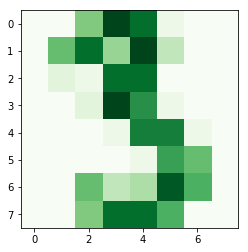

In [4]:
plt.imshow(p[3].reshape(8,8),cmap=plt.cm.Greens)

## Question 2

In [5]:
df1=pd.DataFrame(p)
df1.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [6]:
df2=pd.DataFrame(q)
df2.head()

,0
0,0
1,1
2,2
3,3
4,4


## Question 3

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
p_train,p_test,q_train,q_test=train_test_split(p,q,test_size=0.4)

## Question 4

In [9]:
from sklearn.linear_model import LogisticRegression

In [10]:
reg=LogisticRegression()
reg.fit(p_train,q_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [11]:
pred=reg.predict(p_test)

In [12]:
result=pd.DataFrame({"Predicted":pred,"Actual":q_test})

In [13]:
result

,Actual,Predicted
0,3,3
1,2,2
2,3,3
3,1,1
4,7,7
5,0,0
6,3,3
7,4,4
8,3,3
9,5,5


In [14]:
reg.score(p_test,q_test)*100

96.24478442280946

## Question 5

In [15]:
kfold=model_selection.KFold(n_splits=10,random_state=7)    

In [16]:
### a.Classification accuracy

results=model_selection.cross_val_score(reg,p,q,cv=kfold,scoring="accuracy")      
results

array([0.90555556, 0.95      , 0.89444444, 0.91666667, 0.94444444,
       0.97222222, 0.97777778, 0.95530726, 0.8603352 , 0.93854749])

In [17]:
results.sum()/10

0.931530105524519

In [18]:
### b.Logarithmic loss

results=model_selection.cross_val_score(reg,p,q,cv=kfold,scoring="neg_log_loss")
results

array([-0.45778991, -0.14434019, -0.61739005, -0.27333073, -0.27594791,
       -0.12824496, -0.11027347, -0.12335714, -0.62604368, -0.6855272 ])

In [19]:
results.sum()/10

-0.34422452331430986

In [20]:
### c.R2 Metrics

results=model_selection.cross_val_score(reg,p,q,cv=kfold,scoring="r2")
results

array([0.73184699, 0.86942354, 0.81023661, 0.79423609, 0.82434177,
       0.94343263, 0.92524112, 0.90725247, 0.60169024, 0.82555495])

In [21]:
results.sum()/10

0.8233256404108781

In [22]:
### d.Mean absolute error

from sklearn import metrics
print(metrics.mean_absolute_error(q_test,pred))

0.14186369958275383


In [23]:
### e.Mean squared error

print(metrics.mean_squared_error(q_test,pred))

0.7538247566063978


In [24]:
### f.Confusion matrix

from sklearn.metrics import confusion_matrix
confusion_matrix(q_test,pred)

array([[67,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 66,  0,  1,  0,  0,  0,  0,  1,  0],
       [ 0,  0, 67,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 77,  0,  0,  0,  1,  0,  1],
       [ 0,  2,  0,  0, 69,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 77,  0,  0,  0,  1],
       [ 0,  1,  0,  0,  0,  1, 65,  0,  1,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 74,  1,  2],
       [ 0,  5,  0,  1,  0,  0,  0,  0, 63,  2],
       [ 0,  1,  0,  0,  0,  1,  0,  0,  2, 67]], dtype=int64)

In [25]:
### g.Classification report

print(classification_report(q_test,pred))      

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        67
          1       0.88      0.97      0.92        68
          2       1.00      0.99      0.99        68
          3       0.96      0.97      0.97        79
          4       0.99      0.97      0.98        71
          5       0.97      0.99      0.98        78
          6       1.00      0.96      0.98        68
          7       0.99      0.95      0.97        78
          8       0.93      0.89      0.91        71
          9       0.92      0.94      0.93        71

avg / total       0.96      0.96      0.96       719



In [26]:
###aaj ka h

In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [30]:
model=KNeighborsClassifier()

In [31]:
model.fit(p_train,q_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [32]:
pred=model.predict(p_test)

In [36]:
results=model_selection.cross_val_score(model,p,q,cv=kfold,scoring="accuracy")
results

array([0.92777778, 0.98888889, 0.98888889, 0.97777778, 0.96111111,
       0.97777778, 0.98888889, 0.98324022, 0.98324022, 0.96089385])

In [37]:
results.sum()/10

0.9738485412787089

In [38]:
print(classification_report(q_test,pred))      

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        67
          1       0.92      1.00      0.96        68
          2       1.00      1.00      1.00        68
          3       1.00      1.00      1.00        79
          4       0.99      0.99      0.99        71
          5       0.97      0.99      0.98        78
          6       1.00      0.99      0.99        68
          7       1.00      1.00      1.00        78
          8       0.99      0.94      0.96        71
          9       0.99      0.94      0.96        71

avg / total       0.99      0.98      0.98       719



In [42]:
sns.lmplot("Actual",y= "Predicted",result)

SyntaxError: non-keyword arg after keyword arg (<ipython-input-42-c08fb1998ee3>, line 1)